# Агрегация исходных данных  

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
plt.style.use('bmh')
plt.rcParams["figure.figsize"] = (15,8)

### 1. Загрузите данные за май 2016 года

In [3]:
taxi = pd.read_csv("yellow_tripdata_2016-05.csv");

In [4]:
taxi.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76
5,2,2016-05-01 00:00:00,2016-05-01 00:05:19,2,0.63,-73.979294,40.755764,1,N,-73.988014,40.758469,1,5.0,0.5,0.5,0.00,0.0,0.3,6.30
6,2,2016-05-01 00:00:00,2016-05-01 00:15:43,1,6.68,-73.981544,40.780739,1,N,-73.937805,40.855343,1,20.5,0.5,0.5,2.00,0.0,0.3,23.80
7,2,2016-05-01 00:00:00,2016-05-01 00:06:31,1,1.48,-73.987198,40.750507,1,N,-73.980797,40.767826,1,7.0,0.5,0.5,1.66,0.0,0.3,9.96
8,2,2016-05-01 00:00:00,2016-05-01 00:00:00,4,1.59,-74.001610,40.740990,1,N,-73.981079,40.730675,1,8.0,0.5,0.5,0.00,0.0,0.3,9.30
9,2,2016-05-01 00:00:00,2016-05-01 00:00:00,3,3.52,-74.013855,40.714119,1,N,-73.994049,40.761452,2,13.0,0.5,0.5,0.00,0.0,0.3,14.30


### 2. Проведите фильтрацию

Удалите поездки с нулевой длительностью, нулевым количеством пассажиров, нулевым расстоянием поездки по счётчику, координатами начала, не попадающими в прямоугольник Нью-Йорка (Нью-Йорк вписан в прямоугольник от -74.25559 до -73.70001 градусов долготы и от 40.49612 до 40.91553 широты)

In [5]:
lon_west = -74.25559
lon_east = -73.70001
lat_south = 40.49612
lat_north = 40.91553

In [6]:
taxi_new = taxi.loc[(taxi['trip_distance']!=0)&(taxi['passenger_count']!=0)]

In [7]:
taxi_new = taxi_new.loc[(taxi_new['tpep_pickup_datetime']!= taxi_new['tpep_dropoff_datetime'])]

In [8]:
(taxi_new['tpep_pickup_datetime']== taxi_new['tpep_dropoff_datetime']).sum()

0

pickup_longitude - долгота, pickup_latitude - широта 

In [9]:
taxi_new = taxi_new.loc[(taxi_new['pickup_longitude']>= lon_west)&(taxi_new['pickup_longitude']<= lon_east)&
                        (taxi_new['pickup_latitude']>= lat_south)&(taxi_new['pickup_latitude']<= lat_north)]

In [10]:
taxi_new

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11836837,2,2016-05-31 23:53:01,2016-06-01 00:00:24,2,1.89,-73.947876,40.774818,1,N,-73.974274,40.779797,1,8.0,0.5,0.5,1.86,0.0,0.3,11.16
11836838,2,2016-05-31 23:53:02,2016-06-01 00:19:36,1,15.21,-73.789467,40.646942,1,N,-73.893929,40.731426,1,42.0,0.5,0.5,8.66,0.0,0.3,51.96
11836839,2,2016-05-31 23:53:02,2016-05-31 23:59:07,1,1.80,-74.008659,40.719723,1,N,-73.999580,40.743649,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56
11836840,2,2016-05-31 23:53:03,2016-06-01 00:05:47,1,2.28,-73.981644,40.758862,1,N,-73.952637,40.766491,1,11.0,0.5,0.5,2.46,0.0,0.3,14.76


### 3. Агрегируйте данные  по часам и областям 

In [12]:
region = pd.read_csv("regions.csv", sep=';')
region.head()

,region,west,east,south,north
0,1,-74.25559,-74.244478,40.496120,40.504508
1,2,-74.25559,-74.244478,40.504508,40.512896
2,3,-74.25559,-74.244478,40.512896,40.521285
3,4,-74.25559,-74.244478,40.521285,40.529673
4,5,-74.25559,-74.244478,40.529673,40.538061


In [13]:
def regions_function(x):
    d_lon = (lon_east - lon_west) / 50
    d_lat = (lat_north - lat_south) / 50
    return int(min((x[0] - lon_west) // d_lon, 49) * 50  + min((x[1] - lat_south) // d_lat, 49))

In [14]:
taxi_new['region'] = taxi_new[['pickup_longitude', 'pickup_latitude']].apply(regions_function, axis=1)

In [15]:
taxi_new['tpep_pickup_datetime'] = pd.to_datetime(taxi_new['tpep_pickup_datetime']).dt.strftime('%Y-%m-%d %H')

In [16]:
taxi_new['trips_number'] = 1

In [17]:
taxi_agg = taxi_new.groupby(['tpep_pickup_datetime', 'region'], as_index=False).agg({'trips_number':'count'})

### 4. Выведите первые строки полученной таблицы 

с указанием времени, идентификатора зоны и количества поездок

In [27]:
(taxi_agg['trips_number']==0).sum()

0

In [18]:
taxi_agg.head()

,tpep_pickup_datetime,region,trips_number
0,2016-05-01 00,1014,1
1,2016-05-01 00,1016,1
2,2016-05-01 00,1028,3
3,2016-05-01 00,1029,1
4,2016-05-01 00,1032,4


In [19]:
taxi_agg['region'].nunique()

1217

In [25]:
taxi_agg.to_csv('taxi_agg_2016.csv', index=False)

### 5. Постройте график количества поездок жёлтого такси из ячейки, содержащей Empire State Building



In [20]:
esb_latitude = 40.748817
esb_longitude = -73.985428

In [21]:
for i in range(region.shape[0]):
    reg, west, east, south, north = region.iloc[i]
    if (east>=esb_longitude >= west)&(north>=esb_latitude>=south):
        reg_esb = reg
        print(reg_esb)
        break

1231.0


In [22]:
esb_df = taxi_agg.loc[taxi_agg['region']== reg_esb].set_index('tpep_pickup_datetime')

<AxesSubplot:xlabel='tpep_pickup_datetime'>

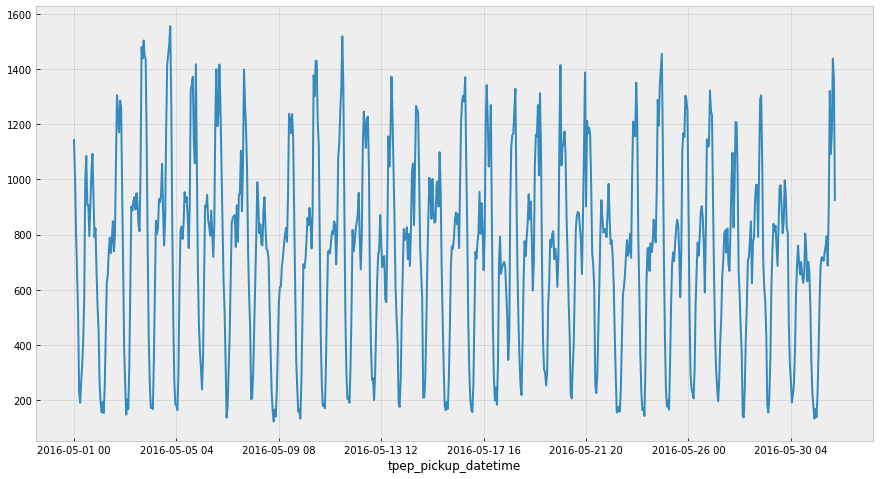

In [23]:
esb_df['trips_number'].plot()

### 6. Посчитайте, сколько  пар час-ячейка, для которых не было совершено ни одной поездки

In [24]:
# если бы поездки были совершены в каждый час в каждом районе, то их количество было бы:
n = 50*50*24*31
print(f"Количество непредставленных пар: {n - taxi_agg.shape[0]}")

Количество непредставленных пар: 1718238
